In [1]:
import time
from tqdm import tqdm
import wave, sys

import contextlib
from pydub import AudioSegment
import os
import scipy.io.wavfile as wav
import speechpy
import numpy as np

import soundfile as sf
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from datetime import datetime

import glob
import librosa

from IPython.display import Audio, display
%matplotlib inline


import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from python_speech_features import mfcc, logfbank
import librosa
import glob
from scipy import fftpack

import noisereduce as nr
from scipy.signal import butter, lfilter, freqz

/home/neko/miniconda3/envs/pyaudio/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
/home/neko/miniconda3/envs/pyaudio/lib/python3.8/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))
def plot(x, title):
    plt.figure(1)
    plt.title(title)
    plt.plot(x)
    plt.show()
def plot_fft(x, title):
    time_step = 0.02
    period = 5.
    time_vec = np.arange(0, 20, time_step)
    sig_fft = fftpack.fft(x)
    power = np.abs(sig_fft)
    sample_freq = fftpack.fftfreq(x.size, d=time_step)
    
    plt.figure(figsize=(6, 5))
    plt.plot(sample_freq, power)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power')
    plt.title(title)

    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    peak_freq = freqs[power[pos_mask].argmax()]

    np.allclose(peak_freq, 1./period)
    # fft_power.append(power.max())

    print('Audio Name: ', title, 'Power : ', power.max())

#     axes = plt.axes([0.55, 0.3, 0.3, 0.5])
#     plt.title('Peak frequency')
#     plt.plot(freqs[:8], power[:8])
#     plt.setp(axes, yticks=[])
#     plt.savefig('/home/neko/Desktop/MAS-testing 27 Aug/test14sept/{}.png'.format(file))
    scipy.signal.find_peaks_cwt    
def filterasi(path, noise_path):
    signal, rate = librosa.load(path)
    noise, noise_rate = librosa.load(noise_path)
    noisyPart = noise[:]
    filtered = nr.reduce_noise(audio_clip=signal, noise_clip=noisyPart, verbose=False)
    print('Original Signal')
    play(signal,rate)
    print('Filtered Signal')
    play(filtered, rate)
    return filtered, rate      
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    print('low: ', low, 'high :', high)
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [35]:
path = '/home/neko/Desktop/MAS-testing 27 Aug/demo_GUI/train/good/good_0.wav' 

path_wnoise = '/home/neko/Desktop/MAS-testing 27 Aug/testing 1/chunk_sound/sound_6.wav'
# path_wnoise = '/home/neko/Desktop/MAS-testing 27 Aug/testing 1/chunk_sound/sound_5.wav'

noise_path = '/home/neko/Desktop/MAS-testing 27 Aug/testing 1/chunk_noise/noise_0.wav'
noise_path1 = '/home/neko/Desktop/MAS-testing 27 Aug/testing 1/chunk_noise/noise_1.wav'

Original Signal


Filtered Signal


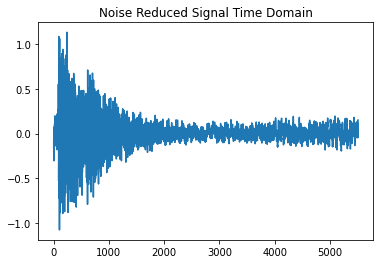

Audio Name:  Noise Reduced Signal Frequency Domain Power :  174.06275178045482


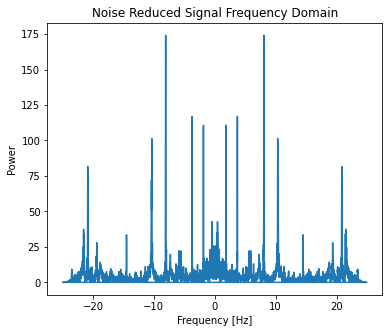

In [36]:
filtered, rate = filterasi(path_wnoise, noise_path)
plot(filtered, 'Noise Reduced Signal Time Domain')
plot_fft(filtered, 'Noise Reduced Signal Frequency Domain')

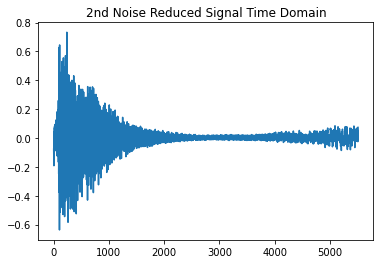

Audio Name:  2nd Noise Reduced Signal Frequency Domain Power :  115.69533239236672


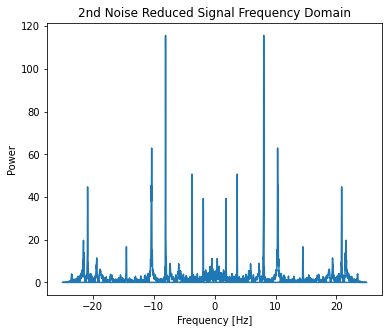

In [37]:
noise, noise_rate = librosa.load(noise_path1)
noisyPart = noise[:]
filtered1 = nr.reduce_noise(audio_clip=filtered, noise_clip=noisyPart, verbose=False)
plot(filtered1, '2nd Noise Reduced Signal Time Domain')
plot_fft(filtered1, '2nd Noise Reduced Signal Frequency Domain')
play(filtered1, rate)

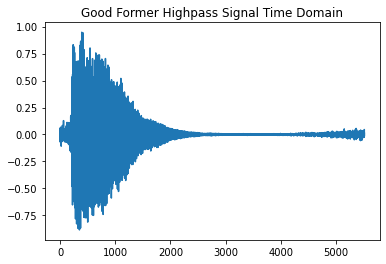

Audio Name:  Good Former Highpass Signal Frequency Domain Power :  204.6109858783546


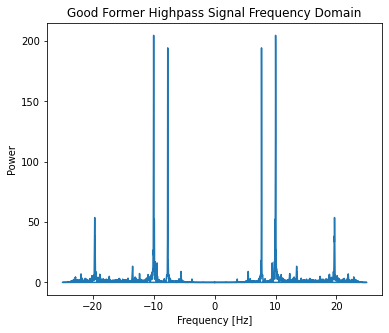

In [34]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

y = butter_highpass_filter(filtered1, 3000, rate, order=4)
plot(y, 'Good Former Highpass Signal Time Domain')
plot_fft(y, 'Good Former Highpass Signal Frequency Domain')
play(y, rate)

low:  0.09070294784580499 high : 0.45351473922902497


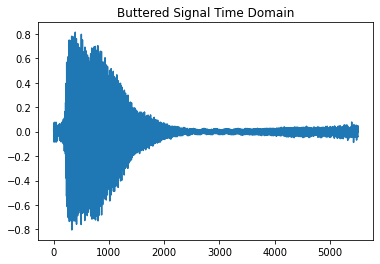

Audio Name:  Buttered Signal Frequency Domain Power :  222.99837135809685


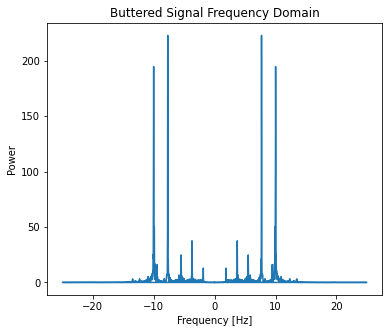

In [33]:
y = butter_bandpass_filter(filtered1, 1000, 5000, rate, order=4)
plot(y, 'Buttered Signal Time Domain')
plot_fft(y, 'Buttered Signal Frequency Domain')
play(y, rate)

In [ ]:
filtered

In [ ]:
signal, rate = librosa.load(path_wnoise)
plot(signal, 'Good Former Without Noise Original Signal Time Domain')
play(signal,rate)
plot_fft(signal, 'Good Former Without Noise Original Signal Frequency Domain')

In [ ]:
# plot(signal, 'Test')
# plot_fft(signal, 'Test')
filtered, rate = filterasi(path, noise_path)

In [ ]:
y_wnoise = butter_highpass_filter(filtered1, 3000, rate, order=4)
plot(y_wnoise, 'Highpass Signal Time Domain')
plot_fft(y_wnoise, 'Highpass Signal Frequency Domain')
play(y_wnoise, rate)

In [ ]:
signal, rate = librosa.load(path)
plot(signal, 'Original Signal Time Domain')
plot_fft(signal, 'Original Signal Frequency Domain')

# filtered, rate = filterasi(path, noise_path)
# plot(filtered, 'Noise Reduced Signal Time Domain')
# plot_fft(filtered, 'Noise Reduced Signal Frequency Domain')

# y = butter_bandpass_filter(filtered, 120, 600, rate, order=4)
# plot(y, 'Buttered Signal Time Domain')
# plot_fft(y, 'Buttered Signal Frequency Domain')
# play(y, rate)

In [ ]:
signal, rate = librosa.load(path)
noise, noise_rate = librosa.load(noise_path)
noise1, noise_rate1 = librosa.load(noise_path1)
# play(noise, noise_rate)

fig, axs = plt.subplots(2, 1)
axs[0].plot(signal, rate, noise, noise_rate)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

In [ ]:
path = '/home/neko/Desktop/MAS-testing 27 Aug/demo_GUI/train/bad/bad_9.wav'
# filterasi(path, noise_path)
fft(path)
# print('FFT AFTER NOISE REDUCED:  ', fft(filtered, rate, 'Noise reduced'))
# print('FFT AFTER BANPASSED:  ', fft(y, rate, 'Bandpassed'))
# print('FFT AFTER NOISE REDUCED & BANPASSED:  ', fft(y_af, rate, 'Noise reduced & Bandpassed'))

In [ ]:
noisyPart = noise[:]
noisyPart1 = noise1[:]
filtered = nr.reduce_noise(audio_clip=signal, noise_clip=noisyPart, verbose=True)
filtered1 = nr.reduce_noise(audio_clip=filtered, noise_clip=noisyPart1, verbose=True)

play(filtered1, rate)

In [ ]:
###########################################################################################
###########################  NOISE FILTERED ###############################################
###########################################################################################


file = path.split('/')[-1]

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig_fft = fftpack.fft(filtered1)


power = np.abs(sig_fft)

sample_freq = fftpack.fftfreq(filtered1.size, d=time_step)
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title(file)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

np.allclose(peak_freq, 1./period)
# fft_power.append(power.max())

print('Audio Name: ', file, 'Power : ', power.max())

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
plt.savefig('/home/neko/Desktop/MAS-testing 27 Aug/test14sept/{}.png'.format(file))
scipy.signal.find_peaks_cwt

# play(filtered, rate)

In [ ]:
###########################################################################################
###########################  BANDPASS #####################################################
###########################################################################################

from scipy.signal import butter, lfilter, freqz

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

x, fs = filtered, rate

lowcut = 120
highcut = 700

b, a = butter_bandpass(lowcut, highcut, fs, order=4)
w, h = freqz(b, a)

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=4)
play(y,fs)

plt.figure('Butterworth(Low-pass) filter frequency response')
plt.title('Butterworth(Low-pass) filter frequency response')
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
################ Need to convert to rad/s freq cutoff * 2pi  ################################
plt.axvline(2*np.pi*lowcut/fs, color='green') # cutoff frequency
plt.axvline(2*np.pi*highcut/fs, color='green') # cutoff frequency

plt.show()

# y = butter_bandpass_filter(x, lowcut, highcut, fs, order=1)
# play(y, fs)
#  play()

###########################################################################################
###########################  PLOT FFT #####################################################
###########################################################################################

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig_fft = fftpack.fft(y)


power = np.abs(sig_fft)

sample_freq = fftpack.fftfreq(y.size, d=time_step)
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title(file)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

np.allclose(peak_freq, 1./period)
# fft_power.append(power.max())

print('Audio Name: ', file, 'Power : ', power.max())

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
plt.savefig('/home/neko/Desktop/MAS-testing 27 Aug/test14sept/bandpassed.png'.format(file))
scipy.signal.find_peaks_cwt

# play(y, rate)

In [ ]:
from io import BytesIO
import tempfile
import requests
import numpy as np
import scipy.signal as sg
import pydub
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

x, fr = librosa.load(path)
play(x, fr)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
t = np.linspace(0., len(x) / fr, len(x))
ax.plot(t, x, lw=1)


# plt.figure(figsize=(6, 5))
# plt.plot(x, fr)
# plt.xlabel('Time')
# plt.ylabel('Audio')
# plt.title(file)


###########################################################################################
###########################  PLOT FFT #####################################################
###########################################################################################

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig_fft = fftpack.fft(x)


power = np.abs(sig_fft)

sample_freq = fftpack.fftfreq(x.size, d=time_step)
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title(file)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

np.allclose(peak_freq, 1./period)
# fft_power.append(power.max())

print('Audio Name: ', file, 'Power : ', power.max())

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
plt.savefig('/home/neko/Desktop/MAS-testing 27 Aug/test14sept/original.png'.format(file))
scipy.signal.find_peaks_cwt


In [ ]:
b, a = sg.butter(4, 500. / (fr / 2.), 'low')
x_fil = sg.filtfilt(b, a, x)
play(x_fil, fr)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=1)
ax.plot(t, x_fil, lw=1)

In [ ]:
b, a = sg.butter(4, 1000. / (fr / 2.), 'high')
x_fil = sg.filtfilt(b, a, x)
play(x_fil, fr)
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(t, x, lw=1)
ax.plot(t, x_fil, lw=1)

In [ ]:
signal, rate = y, fs
file = path.split('/')[-1]

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig_fft = fftpack.fft(signal)


power = np.abs(sig_fft)

sample_freq = fftpack.fftfreq(signal.size, d=time_step)
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title(file)

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

np.allclose(peak_freq, 1./period)
# fft_power.append(power.max())

print('Audio Name: ', file, 'Power : ', power.max())

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
plt.savefig('/home/neko/Desktop/MAS-testing 27 Aug/test14sept/{}.png'.format(file))
scipy.signal.find_peaks_cwt

In [ ]:
path = "/home/neko/Desktop/MAS-testing 27 Aug/demo_GUI/train/bad/*.wav"

# i = 
audio_name =[]
fft_power = []

for fileName in glob.iglob(path):
    print(fileName.split('/')[-1])
    file = fileName.split('/')[-1]
#     print(file)
    signal, rate = librosa.load(fileName)
#     fft = calc_fft(signal, rate)
#     power = np.abs(fft)
#     plot_fft(fft)
#     plt.show()
#     print('file: ', file,  fft)



##################################################################

    time_step = 0.02
    period = 5.

    time_vec = np.arange(0, 20, time_step)
    sig_fft = fftpack.fft(signal)

    # And the power (sig_fft is of complex dtype)
    power = np.abs(sig_fft)

    # The corresponding frequencies
    sample_freq = fftpack.fftfreq(signal.size, d=time_step)
    
#     print(file)
    # Plot the FFT power
    plt.figure(figsize=(6, 5))
    plt.plot(sample_freq, power)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power')
    plt.title(file)

    # Find the peak frequency: we can focus on only the positive frequencies
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    peak_freq = freqs[power[pos_mask].argmax()]

    # Check that it does indeed correspond to the frequency that we generate
    # the signal with
    np.allclose(peak_freq, 1./period)
    fft_power.append(power.max())

    print('Audio Name: ', file, 'Power : ', power.max())
#     print(audio_name, name)
#     if power.max() > 70:
#         scipy.io.wavfile.write('/home/neko/Desktop/Former GUI/Model/TRAIN/GOOD/{}'.format(file), rate, signal)
        
#         print('OK ','Audio Name: ', file, 'Power : ', power.max())
#     else:
#         print('NG ','Audio Name: ', file, 'Power : ', power.max())
#         scipy.io.wavfile.write('/home/neko/Desktop/Former GUI/Model/TRAIN/BAD/{}'.format(file), rate, signal)
    
    
    # An inner plot to show the peak frequency
    axes = plt.axes([0.55, 0.3, 0.3, 0.5])
    plt.title('Peak frequency')
    plt.plot(freqs[:8], power[:8])
    plt.setp(axes, yticks=[])
    plt.savefig('/home/neko/Desktop/MAS-testing 27 Aug/demo_GUI/train/plot/{}.png'.format(file))
    scipy.signal.find_peaks_cwt
    

In [ ]:
test = "/home/neko/Desktop/Former GUI/data/test.wav"

In [ ]:
#path of datasets all files in this folder will be extracted Class are based on sub folder names or Containing AMB or ITR IN file name
path = '/home/neko/Desktop/Former GUI/Model/TRAIN/'
mle_start = 0
mle_end = 30
#SAVE DATA FILE TO? 2 Files X_?????: MLE /  y_????? : Targets
datapath = 
dataname = 'train_binary'+'MLE_'+str(40-mle_end)
#Generate PNG Vizualization of each extracted feat

In [ ]:
dataname

In [ ]:
rate

In [ ]:
#path of datasets all files in this folder will be extracted Class are based on sub folder names or Containing AMB or ITR IN file name
path = '/home/neko/Desktop/Former GUI/Model/TRAIN/'
mle_start = 0
mle_end = 30
#SAVE DATA FILE TO? 2 Files X_?????: MLE /  y_????? : Targets
datapath = path
dataname = 'train_binary'+'MLE_'+str(40-mle_end)
#Generate PNG Vizualization of each extracted feature (Value true or false)
generateViz = True
viz_filepath = path
#0.1 - 100ms Slide (Bigger = Less Data) (Value must be 0.1 - 5)
augmentation = 5

#AUGMENTATION ERROR AVOIDANCE
if augmentation > 5:
    augmentation = 5
elif augmentation < 0.01:
    augmentation = 5
    
    
fnIndex = []
files = []
# r=root, d=directories, f = files

for ttt in tqdm(range(1)):
    for r, d, f in os.walk(path):
        for file in f:
                if '.wav' in file:
                     if(file.__contains__(".png")==0):
                        print(file)
                        files.append(os.path.join(r, file))
                if '.WAV' in file:
                     if(file.__contains__(".png")==0):
                        print(file)
                        files.append(os.path.join(r, file))



            
print("Files ",len(files))


totalDataWillBe = 0           
TotalD = 0

cutSeconds = 0.05
slideSeconds = augmentation
shift = int(cutSeconds*10)/(slideSeconds*10) - 1
#print("Audio Shift seconds",slideSeconds)
#print("Audio Shifts Segments",shift)
if(shift == 0):
    shift = 1
                
print("Amount of Shifts :",shift)
shift = int(shift) 
i =0
para_fl = 0.005
para_ovlp = 0.60
                       

print("Window Size : ", cutSeconds * 1000 , "ms")                    
print("Expected Data Amount :",totalDataWillBe)
hours = round(TotalD/60/60,2)
mins = round(TotalD/60,2)
secs = round(TotalD,2)
print("Total Duration of all files ",hours,"Hours")
print("Total Duration of all files ",mins,"Minutes")
print("Total Duration of all files ",secs,"Seconds")

totaldata = 1000

##featureShape_x = z.shape[0]
##featureShape_y = z.shape[1]
#Place Holder
featureShape_x = 81
featureShape_y = 40
dataset = np.ndarray(shape=(totaldata,featureShape_x,featureShape_y))
target =   np.ndarray(shape=(totaldata))
print("Dataset",dataset.shape)
print ("Total data",totaldata)
print ("Features Shape X",featureShape_x)
print ("Features Shape Y",featureShape_y)
print ("Initial Dataset Empty Array Shape",dataset.shape)
print ("Initial Target Empty Array Shape",target.shape)


shift = int(cutSeconds/slideSeconds) - 1
print("Audio Shift seconds",slideSeconds)
print("Audio Shifts Segments",shift)

debug = False
if(shift == 0):
    shift = 1
i =0

#Feats = "MFCC"
Feats = "MLE"




totalFiles = 0
for fileindex in tqdm(range(0,len(files))):
    f = files[fileindex]
    

    fname = f
    fnIndex.append(fname)

    fs, signal = wav.read(fname)
    # # ## change here
    # signal = signal.astype(float)
    # signal = signal.sum(axis=1) / 2


    print(f,"sEG")
    print(fs,"kHz")
    print("Channels",signal.shape)
    
    if not (debug):
        signal_preemphasized = speechpy.processing.preemphasis(signal, cof=0.98)
        if (Feats == "MLE"):
            logenergy = speechpy.feature.lmfe(signal, sampling_frequency=fs, frame_length=para_fl, frame_stride=para_fl*para_ovlp,
            num_filters=40, fft_length=2048, low_frequency=20, high_frequency=8000)
            print(logenergy.shape)
            dataset[i] = logenergy
            
        elif(Feats == "MFCC"):
            
            mfcc = speechpy.feature.mfcc(signal, sampling_frequency=fs, frame_length=para_fl, frame_stride=para_fl*para_ovlp, num_cepstral=13, 
            num_filters=40, fft_length=2048, low_frequency=20, high_frequency=8000, dc_elimination=True)
            print(mfcc.shape)
            dataset[i] = mfcc
            

    if(f.__contains__("GOOD")):
        target[i] = 0
    elif(f.__contains__("Bad")):
        target[i] = 1
    elif(f.__contains__("BAD")):
        target[i] = 1  
    elif(f.__contains__("BAD")):
        target[i] = 1
    else:
        target[i] = 1

    #print("Data ",i)
    #print(f.split('CNN/')[1].split('\\')[0])
    
    i += 1        
#print(fnIndex)
#np.save(fnIndex+"X_"+dataname+".npy", meaningful)
                
                
print (i,"Data Extracted")
print(dataset.shape)
meaningful = dataset[0:i][:][:]
meaningfultarget = target[0:i]
AAA = list(meaningfultarget).count(0)
HHH = list(meaningfultarget).count(1)

Aper = int(AAA/i*100)
Hper = int(HHH/i*100)

print(AAA,"samples 0-AMB ",Aper,"%")
print(HHH,"samples 1-ITR ",Hper,"%")


print ("Final Data Extracted Shape",meaningful.shape)
print ("Final Target Extracted Shape",meaningfultarget.shape)

dist = "TT-" +str(i) +" A-" +str(Aper)
print(dist)


for i in range(meaningful.shape[0]):
    logenergy = meaningful[i] 
    logenergy = normalize(logenergy, axis=1, norm='l1')
    meaningful[i] = logenergy

sampleNameHere = "TEST_MLE30to40_l2norm-"+str(para_fl*1000)+"MS-"+str(para_ovlp*100)+"- OVERLAP60-1000ms-SHIFTING-16KHz 20-8K"

dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime(" %d-%b-%Y-%H%M")

print('Current Tdatasetimestamp : ', timestampStr)
filesavename = sampleNameHere+""+dist+"-"+str(meaningful.shape[1]) +"-"+str(meaningful.shape[2])+timestampStr+"H.npy"
np.save(path+"X_"+dataname+".npy", meaningful)
# save
np.save(path+"y_"+dataname+".npy", meaningfultarget) # save
np.save(path+"index",fnIndex)

print("Extraction Complete")
print("NPY FILE NAME : ")
print(filesavename)

if(generateViz):
    
    for xx in range(meaningful.shape[0]):
        logenergy = meaningful[xx]
        target = meaningfultarget[xx]
        
        if(target == 0.0):
            label = "GOOD"
        elif(target == 1.0):
            label = "BAD"
       
        

        fig = plt.figure()
        plt.figure(figsize=(15,5))
        plt.title(label + str(xx)+""+Feats)
        plt.ylabel("Mel-log filterbank")
        plt.xlabel("Frame")
        first_image = np.array(logenergy.transpose((1, 0)), dtype='float')
        #pixels = first_image.reshape((1195, 40))
        plt.imshow(first_image, interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.gca().invert_yaxis()
        plt.savefig(viz_filepath+str(xx)+'-'+label+'.png')
        print('Printing Vizualization', xx)


In [ ]:
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=3, ncols=2, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(3):
        for y in range(2):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1
            
def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y, freq)

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000
    lowcut = 120.0
    highcut = 600.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()


run()

In [ ]:
# https://ipython-books.github.io/116-applying-digital-filters-to-speech-sounds/

from io import BytesIO
import tempfile
import requests
import numpy as np
import scipy.signal as sg
import pydub
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

from scipy.io import wavfile


def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

x, fr = wavfile.read('/home/neko/Desktop/MAS-testing 27 Aug/testing 2/chunk_ting/sound_16.wav')
# play(x, fr)
# fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# t = np.linspace(0., len(x) / fr, len(x))
# ax.plot(t, x, lw=1)


from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

print(x)

lowcut, highcut = 100,700

x_fil, fr = butter_bandpass_filter(x, lowcut, highcut, fs=fr, order=5)
# play(x_fil, fr)
# fig, ax = plt.subplots(1, 1, figsize=(6, 3))
# ax.plot(t, x, lw=1)
# ax.plot(t, x_fil, lw=1)

In [ ]:
low, high = 120, 700

path = "/home/neko/Desktop/MAS-testing 27 Aug/demo_GUI/train/good/*.wav"
audio_name = []
fft_power = []

for fileName in glob.iglob(path):
    print(fileName.split('/')[-1])
    file = fileName.split('/')[-1]
    y, sr = librosa.load(fileName)
    b,a = butter_bandpass(low, high, sr, order=5)
    x = butter_bandpass_filter(y, b, a, sr, order=5)  
    wavfile.write('/home/neko/Desktop/MAS-testing 27 Aug/demo_GUI/train/bp/bandpassed_{}.wav'.format(), sr, x.astype(np.int16))

In [ ]:
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Load data from numpy file
X =  power
y =  np.load('label.npy').ravel()

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Simple SVM
print('fitting...')
clf = SVC(C=20.0, gamma=0.00001)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("acc=%0.3f" % acc)
